# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [10]:
# Konfigurasi akses ke Kaggle untuk mengunduh dataset
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
# Persiapan direktori untuk dataset
dataset_dir = "palmer_penguins_dataset"
os.makedirs(dataset_dir, exist_ok=True)

In [12]:
# Unduh dan ekstrak dataset dari Kaggle
os.system(f"kaggle datasets download -d satyajeetrai/palmer-penguins-dataset-for-eda --unzip -p {dataset_dir}")

0

In [13]:
# Path ke dataset
data_path = os.path.join(dataset_dir, 'penguins.csv')

In [14]:
# Load dataset
df = pd.read_csv(data_path)
print("Dataset berhasil dimuat!")
df.head()

Dataset berhasil dimuat!


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [15]:
# Info dasar dataset
print("Dataset Info:")
df.info()
print(f"\nShape dataset: {df.shape}")
print(f"\nJumlah missing values: {df.isnull().sum().sum()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Shape dataset: (344, 9)

Jumlah missing values: 19


In [16]:
# Distribusi spesies
print("\nDistribusi Spesies:")
print(df['species'].value_counts())


Distribusi Spesies:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [17]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [18]:
# Missing values per kolom
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# Hapus missing values
df_cleaned = df.dropna()
print(f"\nShape setelah menghapus missing values: {df_cleaned.shape}")


Missing Values per Kolom:
id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Shape setelah menghapus missing values: (333, 9)


In [19]:
# Statistik deskriptif per spesies
print("\nStatistik per Spesies:")
print(df_cleaned.groupby('species')[['bill_length_mm', 'bill_depth_mm',
                                   'flipper_length_mm', 'body_mass_g']].describe())


Statistik per Spesies:
          bill_length_mm                                                    \
                   count       mean       std   min     25%    50%     75%   
species                                                                      
Adelie             146.0  38.823973  2.662597  32.1  36.725  38.85  40.775   
Chinstrap           68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Gentoo             119.0  47.568067  3.106116  40.9  45.350  47.40  49.600   

                bill_depth_mm             ... flipper_length_mm         \
            max         count       mean  ...               75%    max   
species                                   ...                            
Adelie     46.0         146.0  18.347260  ...             195.0  210.0   
Chinstrap  58.0          68.0  18.420588  ...             201.0  212.0   
Gentoo     59.6         119.0  14.996639  ...             221.5  231.0   

          body_mass_g                                         

<Figure size 1200x1000 with 0 Axes>

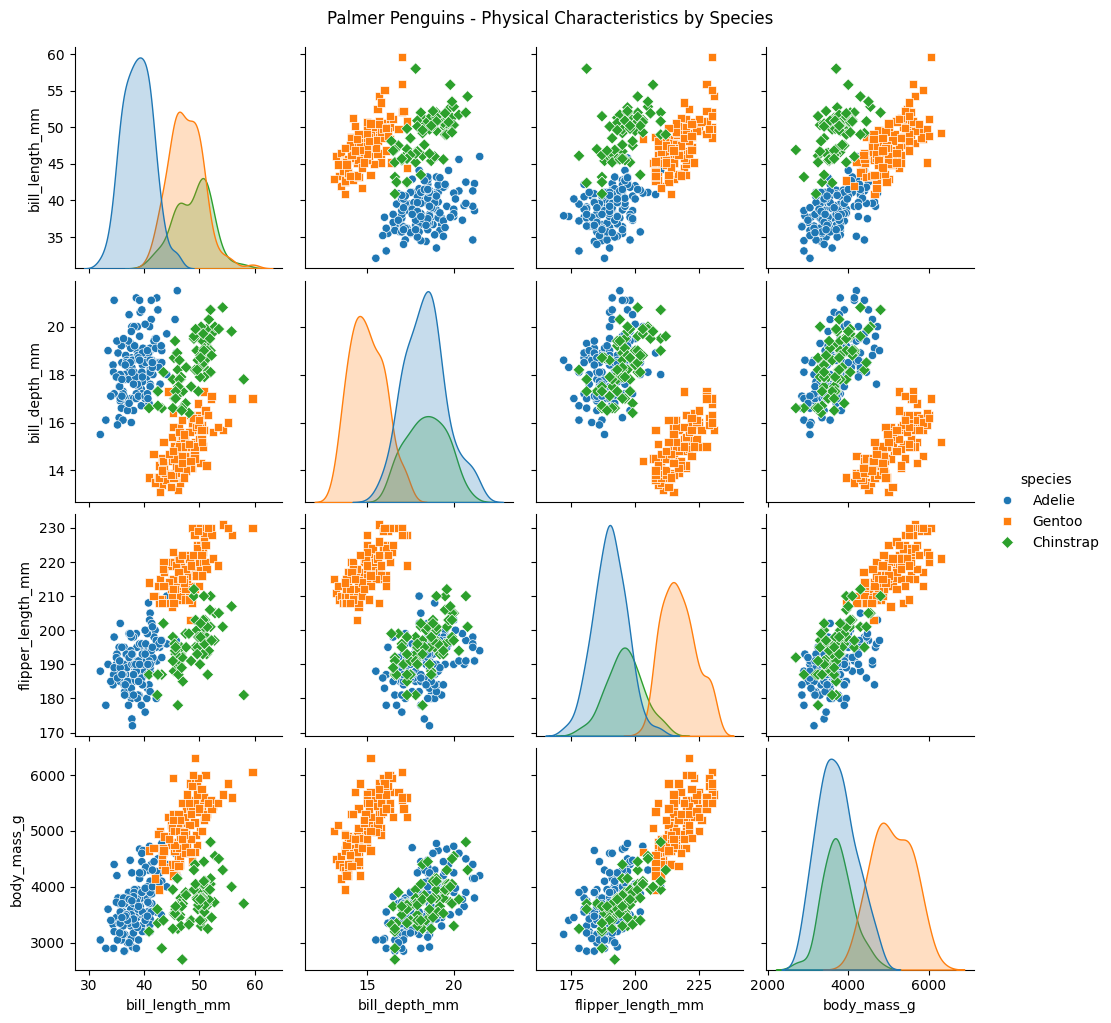

In [20]:
# Visualisasi - Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_cleaned, hue='species', markers=["o", "s", "D"],
             vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.suptitle('Palmer Penguins - Physical Characteristics by Species', y=1.02)
plt.show()

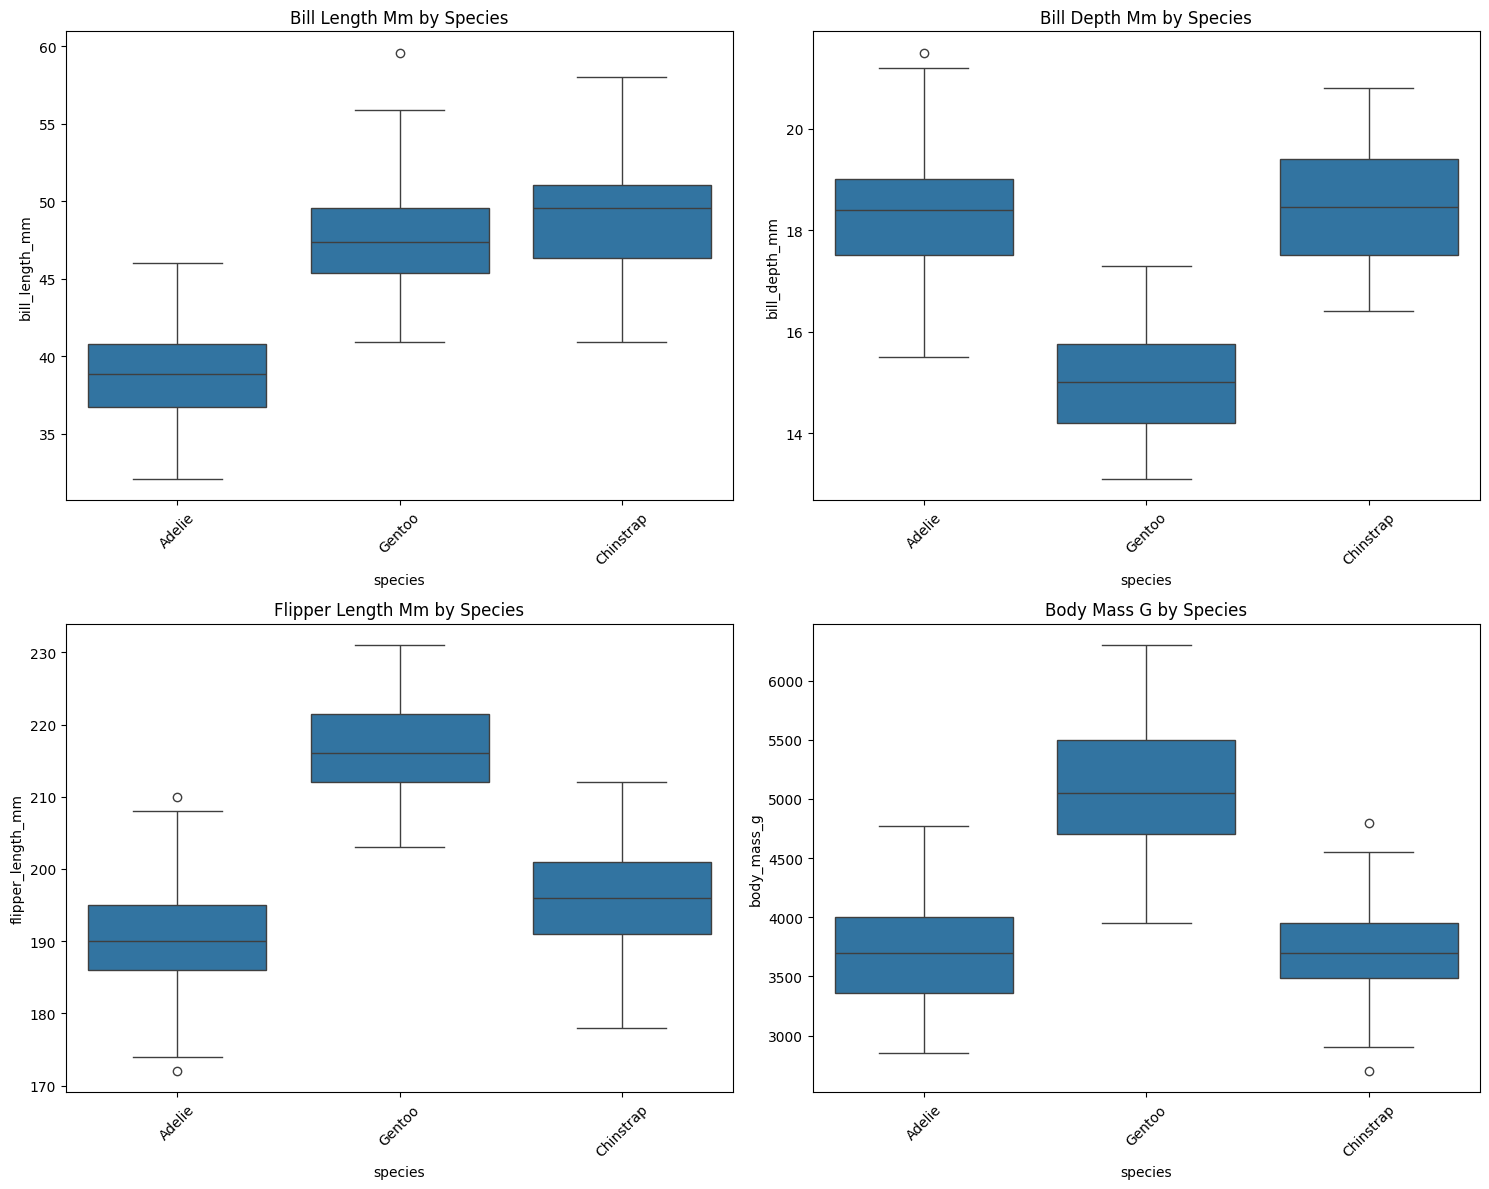

In [21]:
# Box plots untuk setiap measurement
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, measurement in enumerate(measurements):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df_cleaned, x='species', y=measurement, ax=ax)
    ax.set_title(f'{measurement.replace("_", " ").title()} by Species')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

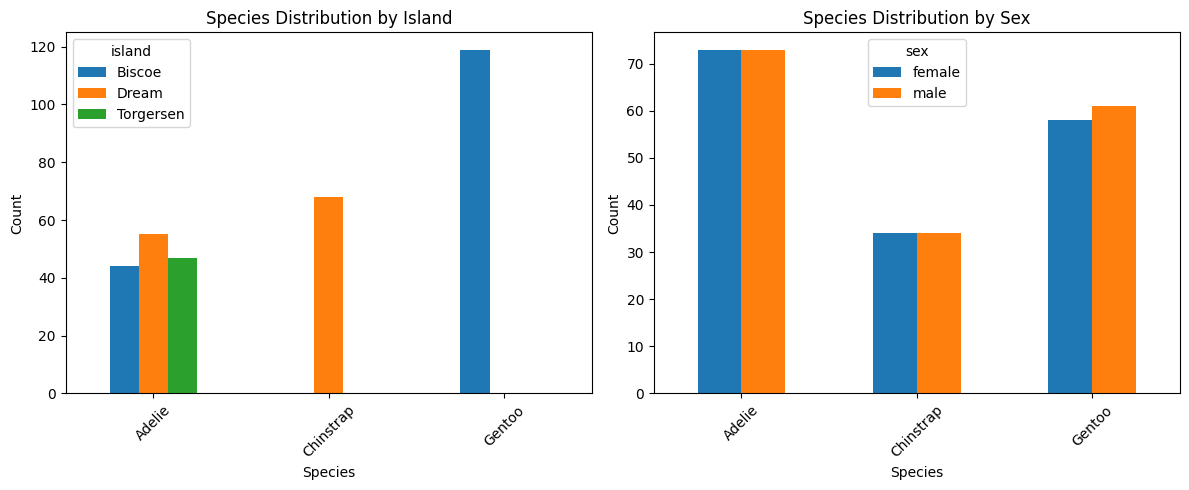

In [22]:
# Distribusi spesies per pulau dan jenis kelamin
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
pd.crosstab(df_cleaned['species'], df_cleaned['island']).plot(kind='bar', ax=plt.gca())
plt.title('Species Distribution by Island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
pd.crosstab(df_cleaned['species'], df_cleaned['sex']).plot(kind='bar', ax=plt.gca())
plt.title('Species Distribution by Sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

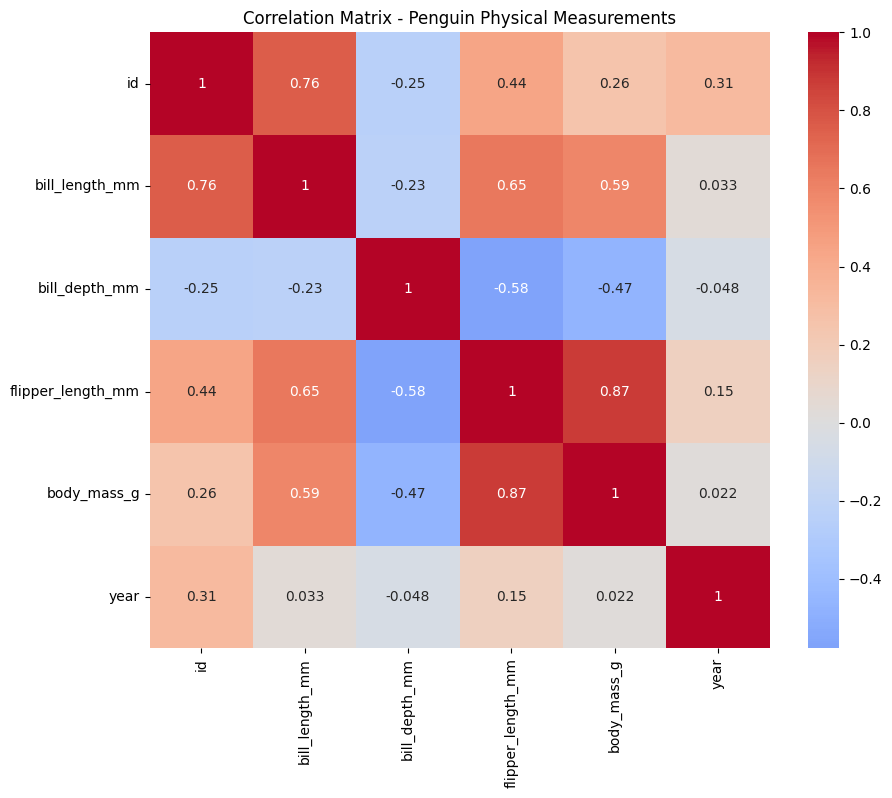

In [23]:
# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Penguin Physical Measurements')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [24]:
def preprocess_penguins_data(df):
    """
    Comprehensive preprocessing for penguins dataset
    """
    # 1. Copy data
    df_processed = df_cleaned.copy()

    # 2. Handle missing values
    print(f"Missing values before: {df_processed.isnull().sum().sum()}")

    # Drop rows with missing values (only ~10 rows)
    df_processed = df_processed.dropna()
    print(f"Missing values after: {df_processed.isnull().sum().sum()}")

    # 3. Encode categorical variables
    # Target variable
    label_encoder = LabelEncoder()
    df_processed['species_encoded'] = label_encoder.fit_transform(df_processed['species'])

    # Other categorical variables
    df_processed['island_encoded'] = LabelEncoder().fit_transform(df_processed['island'])
    df_processed['sex_encoded'] = LabelEncoder().fit_transform(df_processed['sex'])

    # 4. Feature scaling for numerical features
    scaler = StandardScaler()
    numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
    df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

    # 5. Select final features
    feature_columns = numerical_features + ['island_encoded', 'sex_encoded']
    X = df_processed[feature_columns]
    y = df_processed['species_encoded']

    return X, y, df_processed

In [25]:
# Test preprocessing
X, y, df_processed = preprocess_penguins_data(df)
print(f"Final dataset shape: {X.shape}")
print(f"Target distribution: {pd.Series(y).value_counts().to_dict()}")

Missing values before: 0
Missing values after: 0
Final dataset shape: (333, 6)
Target distribution: {0: 146, 2: 119, 1: 68}


In [26]:
# Simpan data yang telah diproses
df_processed.to_csv('penguins_processed.csv', index=False)
print("Data preprocessing selesai! File disimpan sebagai 'penguins_processed.csv'")

Data preprocessing selesai! File disimpan sebagai 'penguins_processed.csv'
